In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
dataset_path = '/content/drive/MyDrive/ITMO/Машинное обучение/weatherHistory.csv'

In [ ]:
data = pd.read_csv(dataset_path)
df = pd.DataFrame(data)

# FORMATTED_DATE, SUMMARY, PRECIP_TYPE, TEMP_APPARENT_TEMP, HUMIDITY, WIND_SPEED, WIND_BEARING, VISIBILITY, LOAD_COVER, PRESSUE, DAILY_SUMMARY
TEMP = 'Temperature (C)'
df.columns.to_list()

['Formatted Date',
 'Summary',
 'Precip Type',
 'Temperature (C)',
 'Apparent Temperature (C)',
 'Humidity',
 'Wind Speed (km/h)',
 'Wind Bearing (degrees)',
 'Visibility (km)',
 'Loud Cover',
 'Pressure (millibars)',
 'Daily Summary']

In [ ]:
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [ ]:
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'])
df = df.sort_values("Formatted Date")
# df.set_index('Formatted Date', inplace=True)
subset = df[(df['Formatted Date'] >= pd.to_datetime('2010-04-01 00:00:00+01:00')) & (df['Formatted Date'] <= pd.to_datetime('2010-05-01 00:00:00+01:00'))]

# subset = df.head(365 * 24)
subset.set_index('Formatted Date', inplace=True)

subset.tail()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
Formatted Date,,,,,,,,,,,
2010-04-30 21:00:00+02:00,Partly Cloudy,rain,17.105556,17.105556,0.63,1.4812,214.0,9.9820,0.0,1011.96,Partly cloudy until evening.
2010-04-30 22:00:00+02:00,Clear,rain,16.438889,16.438889,0.61,3.2039,130.0,15.8263,0.0,1012.36,Partly cloudy until evening.
2010-04-30 23:00:00+02:00,Clear,rain,16.238889,16.238889,0.64,5.2647,125.0,15.3111,0.0,1012.20,Partly cloudy until evening.
2010-05-01 00:00:00+02:00,Clear,rain,15.277778,15.277778,0.71,6.3112,140.0,15.8263,0.0,1012.17,Partly cloudy starting overnight continuing un...
2010-05-01 01:00:00+02:00,Clear,rain,14.238889,14.238889,0.73,10.7065,131.0,15.8263,0.0,1012.25,Partly cloudy starting overnight continuing un...


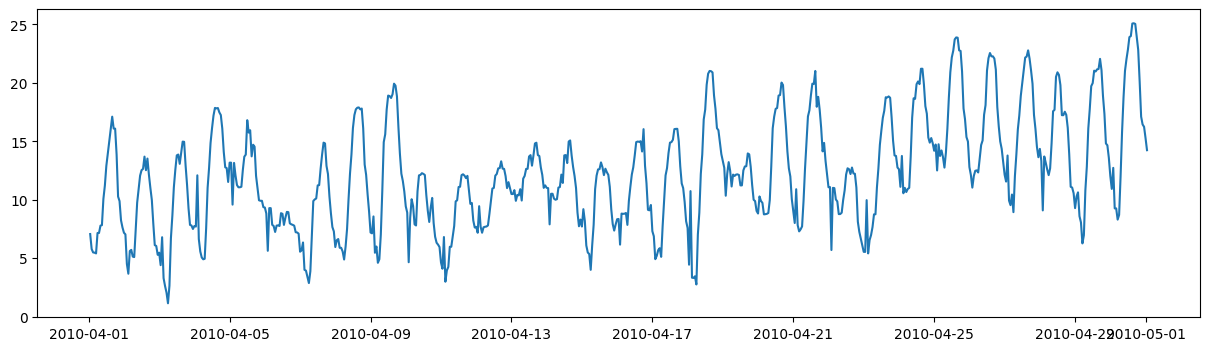

In [ ]:
plt.figure(figsize=(15, 4))
plt.plot(subset.index, subset[TEMP])
plt.show()

0.9471950852650349


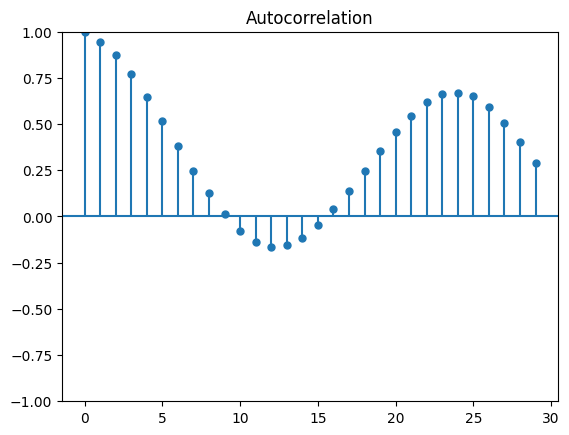

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

temp = subset[TEMP]

lag_1 = temp[1:]
print(np.corrcoef(temp[:-1], lag_1)[0,1])

plot_acf(temp, alpha = None)
plt.show()

<ipython-input-110-15fa64c4b49e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['EMA'] = subset[TEMP].ewm(span=25, adjust=False).mean()


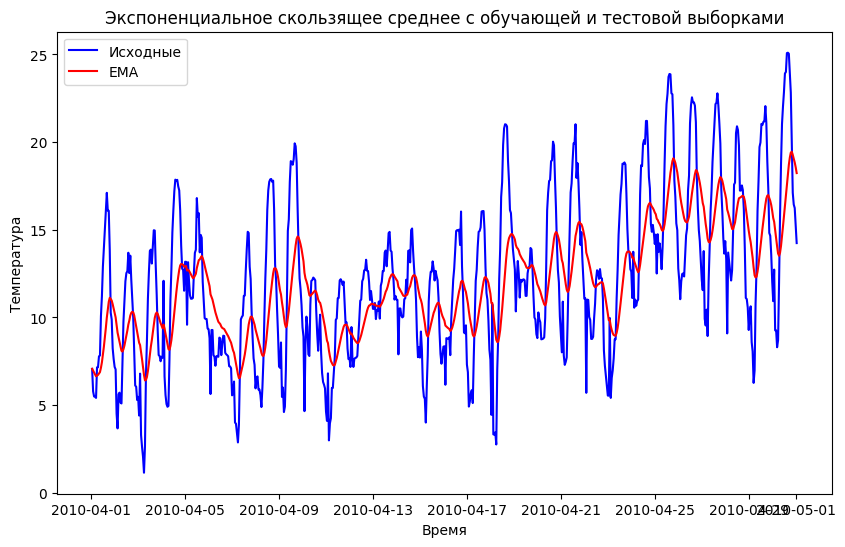

In [ ]:
subset['EMA'] = subset[TEMP].ewm(span=25, adjust=False).mean()

plt.figure(figsize=(10, 6))
plt.plot(subset.index, subset[TEMP], label='Исходные', color='blue')
plt.plot(subset.index, subset['EMA'], label='EMA', color='red')
plt.legend()
plt.title('Экспоненциальное скользящее среднее с обучающей и тестовой выборками')
plt.xlabel('Время')
plt.ylabel('Температура')
plt.show()

In [ ]:
train_size = int(0.7 * len(subset))
subset_train, subset_test = subset[:train_size], subset[train_size:]

print(train_size)
print(f'Размер обучающей выборки: {len(subset_train)}, размер тестовой выборки и прогнозируемый период: {len(subset_test)}')

504
Размер обучающей выборки: 504, размер тестовой выборки и прогнозируемый период: 217


In [ ]:
def plot_original(forcast):
  plt.figure(figsize=(15, 6))
  plt.plot(subset_train.index, subset_train[TEMP], color='blue', label='Обучающая выборка')
  plt.plot(subset_test.index, subset_test[TEMP], color='green', label='Тестовая выборка')
  plt.plot(subset_test.index, forcast, color='yellow', label='Прогнозирование')
  # plt.plot(subset_train.index, subset_train['detrended'], color='purple', label='diff')
  plt.legend()
  plt.xlabel('Время')
  plt.ylabel('Температура')
  plt.show()

In [ ]:
def metrics(forecast):
  mae = mean_absolute_error(subset_test[TEMP], forecast)
  mse = mean_squared_error(subset_test[TEMP], forecast)
  rmse = np.sqrt(mse)
  r2 = r2_score(subset_test[TEMP], forecast)

  print("Mean Absolute Error (MAE):", mae)
  print("Mean Squared Error (MSE):", mse)
  print("Root Mean Squared Error (RMSE):", rmse)
  print("R^2 score: ", r2)

In [ ]:
predict_period = len(subset_test)

###Экспоненциальное скользящее среднее

<ipython-input-120-fa210d639fb3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_train['detrended'] = np.log(subset_train[TEMP]).diff().diff(24)
<ipython-input-120-fa210d639fb3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_train['detrended'] = subset_train['detrended'].fillna(subset_train['detrended'].mean())


ADF Statistic: -14.343241
p-value: 0.000000
Critical Values:
	1%: -3.443
	5%: -2.867
	10%: -2.570


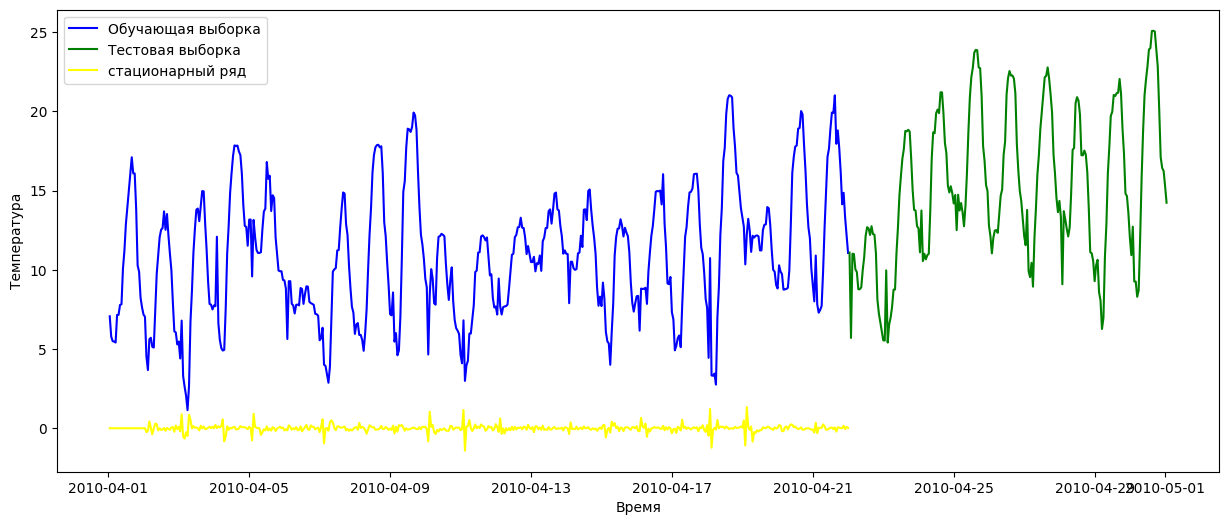

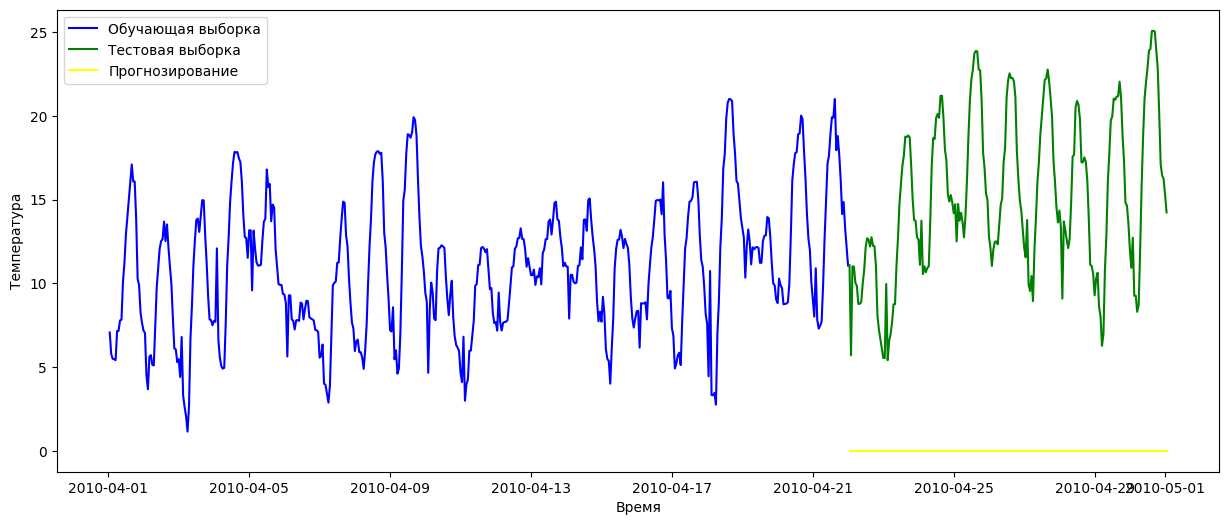

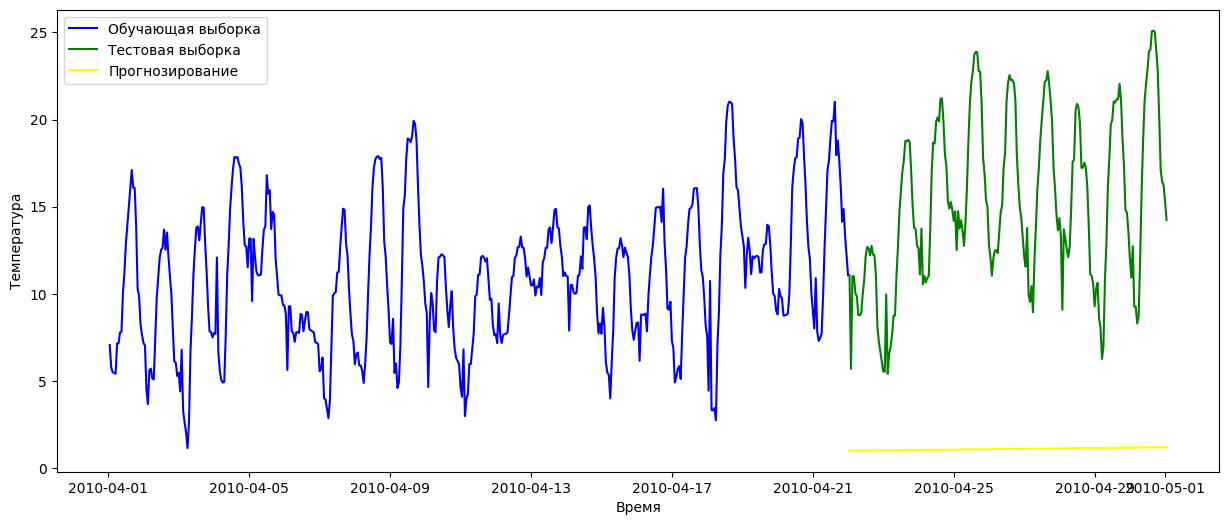

Mean Absolute Error (MAE): 14.119822821775172
Mean Squared Error (MSE): 222.52092757632852
Root Mean Squared Error (RMSE): 14.917135367634382
R^2 score:  -8.531180814079379


In [ ]:
subset_train['detrended'] = np.log(subset_train[TEMP]).diff().diff(24)
subset_train['detrended'] = subset_train['detrended'].fillna(subset_train['detrended'].mean())

adfuller_value = adfuller(subset_train['detrended'])

print('ADF Statistic: %f' % adfuller_value[0])
print('p-value: %f' % adfuller_value[1])
print('Critical Values:')
for key, value in adfuller_value[4].items():
    print('\t%s: %.3f' % (key, value))

plt.figure(figsize=(15, 6))
plt.plot(subset_train.index, subset_train[TEMP], color='blue', label='Обучающая выборка')
plt.plot(subset_test.index, subset_test[TEMP], color='green', label='Тестовая выборка')
plt.plot(subset_train.index, subset_train['detrended'], color='yellow', label='стационарный ряд')
plt.legend()
plt.xlabel('Время')
plt.ylabel('Температура')
plt.show()

ses_model = SimpleExpSmoothing(np.array(subset_train['detrended'])).fit()
ses_predict = ses_model.forecast(predict_period)

plot_original(ses_predict)

ses_predict = np.array(ses_predict) + ses_predict[0]
ses_predict = np.cumsum(ses_predict)
ses_predict = np.exp(ses_predict)

plot_original(ses_predict)

metrics(ses_predict)

<ipython-input-116-19dac7af8532>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_train['detrended'] = subset_train[TEMP].diff()
<ipython-input-116-19dac7af8532>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_train['detrended'] = subset_train['detrended'].diff(24)
<ipython-input-116-19dac7af8532>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https

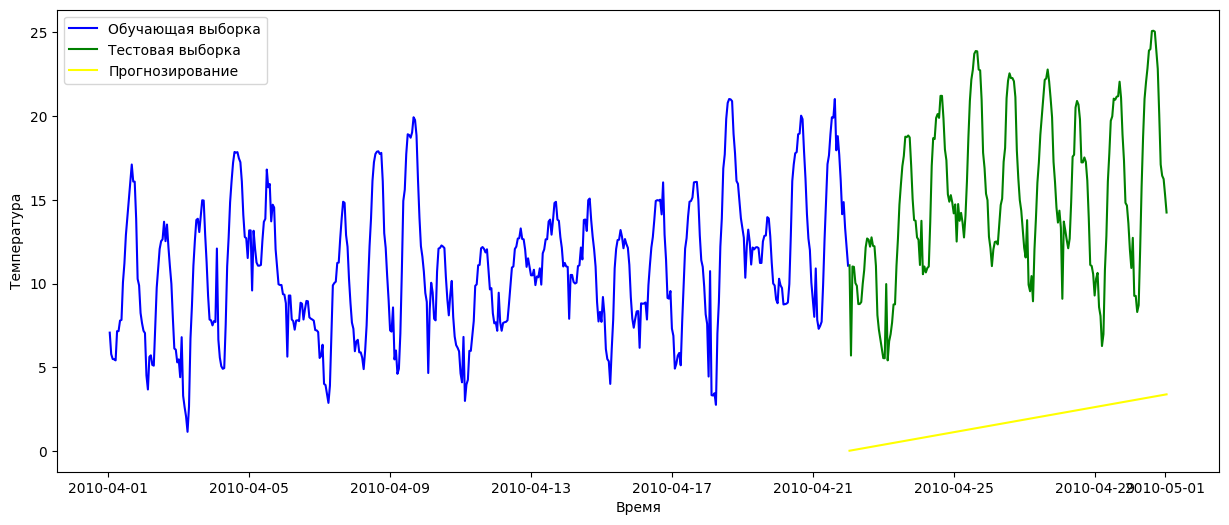

Mean Absolute Error (MAE): 13.521402745193832
Mean Squared Error (MSE): 203.82170659784455
Root Mean Squared Error (RMSE): 14.276613975233923
R^2 score:  -7.730241962306787


In [ ]:
def exponential_moving_average(data, period, alpha=0.01):
    ema = [data[0]]
    for i in range(1, len(data)):
        ema.append(alpha * data[i] + (1 - alpha) * ema[i-1])

    forecast_values = [ema[-1]]
    for _ in range(period - 1):
        forecast_values.append(alpha * forecast_values[-1] + (1 - alpha) * ema[-1])

    return forecast_values

subset_train['detrended'] = subset_train[TEMP].diff()
subset_train['detrended'] = subset_train['detrended'].diff(24)
subset_train['detrended'] = subset_train['detrended'].fillna(subset_train['detrended'].mean())

forecast_values = exponential_moving_average(subset_train['detrended'], predict_period)

forecast_1 = []

for i in range(len(forecast_values)):
  if i > len(forecast_values) - 24 - 1:
    forecast_1.append(forecast_values[i])
  else:
    forecast_1.append(forecast_values[i] + forecast_values[i + 24])

forecast_2 = []

for i in range(len(forecast_1)):
  if i > len(forecast_1) - 1 - 1:
    forecast_2.append(forecast_1[i])
  else:
    forecast_2.append(forecast_1[i] + forecast_1[i + 1])

df_detrended = pd.DataFrame(forecast_values, index=subset_test, columns=['detrended'])
df_detrended['reconstructed'] = df_detrended['detrended'].cumsum()

plot_original(df_detrended['reconstructed'])
metrics(df_detrended['reconstructed'])

###Модель Хольта-Винтера

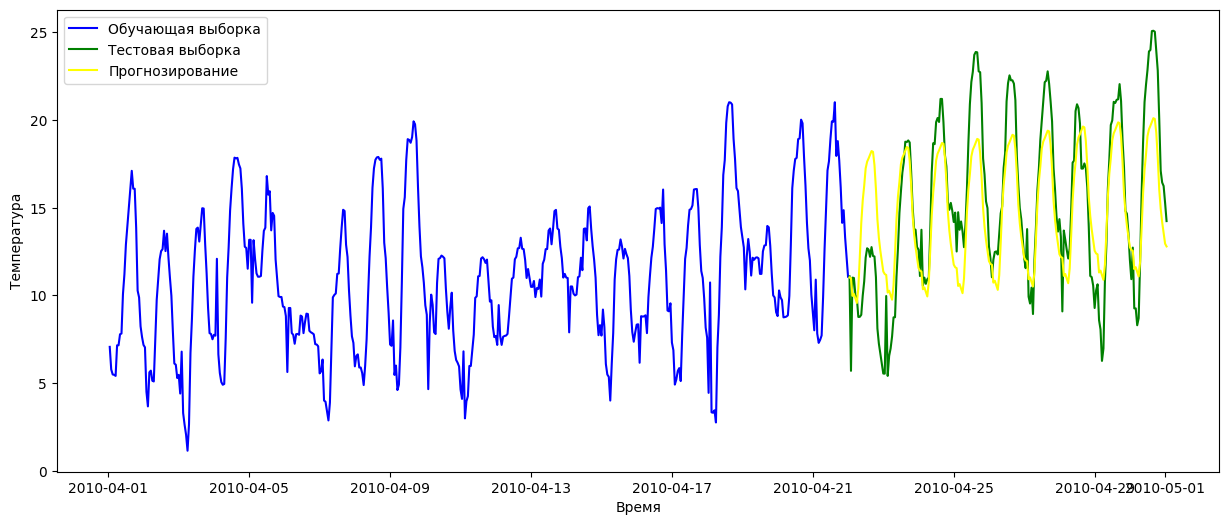

Mean Absolute Error (MAE): 2.3209975529731772
Mean Squared Error (MSE): 7.900405030910247
Root Mean Squared Error (RMSE): 2.8107659153530107
R^2 score:  0.6616040132753864


In [ ]:
N = 50
se_subset_train = subset_train[TEMP]
se_subset_train = np.array(se_subset_train.apply(lambda x: x + N))


se_model = ExponentialSmoothing(se_subset_train, seasonal_periods=24, trend='add', seasonal='add', use_boxcox=True).fit()
se_predict = se_model.forecast(predict_period)
se_predict = se_predict - N

plot_original(se_predict)

metrics(se_predict)

In [ ]:
def holt_winter_forecast(data, seasonal_periods, period, alpha=0.3, beta=0.1, gamma=0.3):
    level = data[0]
    trend = np.mean(np.diff(data[:seasonal_periods]))
    seasonal = np.array([data[i] - level for i in range(seasonal_periods)])

    forecast = []

    for i in range(len(data) + period):
        if i <= seasonal_periods:
            prev_level = level
            prev_trend = trend

            level = alpha * (data[i] - seasonal[i % seasonal_periods]) + (1 - alpha) * (level + trend)
            trend = beta * (level - prev_level) + (1 - beta) * prev_trend
            seasonal[i % seasonal_periods] = gamma * (data[i] - level) + (1 - gamma) * seasonal[i % seasonal_periods]

        if i >= len(data):
            next_level = level + period * trend
            next_seasonal = seasonal[i % seasonal_periods]
            forecast.append(next_level + next_seasonal)

    return forecast

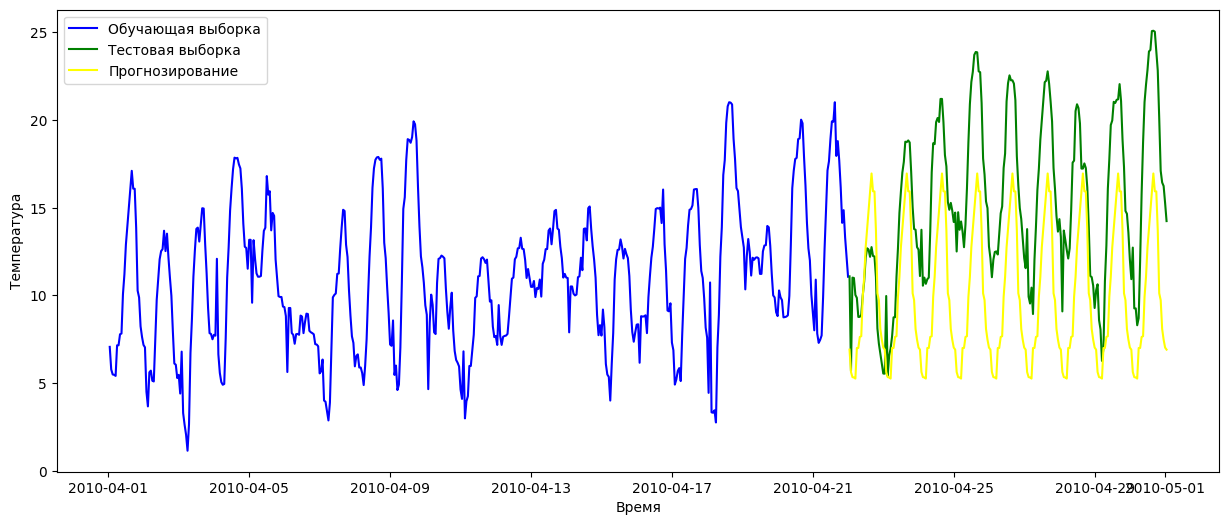

Mean Absolute Error (MAE): 5.491245114950475
Mean Squared Error (MSE): 36.8037556620002
Root Mean Squared Error (RMSE): 6.066609898617201
R^2 score:  -0.5764056606828449


In [ ]:
forecast = holt_winter_forecast(subset_train[TEMP], 24, predict_period)
plot_original(forecast)

metrics(forecast)